## R 실습 2강: 표와 그래프의 작성

### 1) 질적 자료의 정리: 표, 그림

In [1]:
#데이터 불러들이기
movie=read.csv('datasets/movie_choice.csv')

In [2]:
#데이터 구조 확인
str(movie)

'data.frame':	34 obs. of  5 variables:
 $ grade       : int  2 1 2 2 3 4 1 2 3 2 ...
 $ sex         : int  2 1 1 2 1 2 2 2 1 1 ...
 $ group       : int  5 2 3 2 4 5 3 4 1 2 ...
 $ bloodtype   : int  1 2 4 5 3 2 3 4 4 2 ...
 $ choice_movie: int  3 3 4 1 2 1 1 2 3 5 ...


In [3]:
#변수명 확인
names(movie)

[1] "grade"        "sex"          "group"        "bloodtype"    "choice_movie"

In [4]:
#갯수와 변수의 수 확인
dim(movie)

[1] 34  5

In [5]:
#처음 6행의 값 확인
head(movie)

,grade,sex,group,bloodtype,choice_movie
,<int>,<int>,<int>,<int>,<int>
1,2,2,5,1,3
2,1,1,2,2,3
3,2,1,3,4,4
4,2,2,2,5,1
5,3,1,4,3,2
6,4,2,5,2,1


In [6]:
#선호영화 빈도 테이블
table(movie$choice_movie)
length(movie$choice_movie)


1 2 3 4 5 6 
7 6 7 9 3 2 

[1] 34

In [7]:
#선호영화 상대도수 테이블
table(movie$choice_movie)/length(movie$choice_movie)
prop.table(with(movie, table(choice_movie)))


         1          2          3          4          5          6 
0.20588235 0.17647059 0.20588235 0.26470588 0.08823529 0.05882353 

choice_movie
         1          2          3          4          5          6 
0.20588235 0.17647059 0.20588235 0.26470588 0.08823529 0.05882353 

In [8]:
#선호영화 빈도 및 상대도수 테이블
cbind(table(movie$choice_movie), table(movie$choice_movie)/length(movie$choice_movie))
cbind(table(movie$choice_movie), prop.table(with(movie, table(choice_movie))))

1,7,0.20588235
2,6,0.17647059
3,7,0.20588235
4,9,0.26470588
5,3,0.08823529
6,2,0.05882353


1,7,0.20588235
2,6,0.17647059
3,7,0.20588235
4,9,0.26470588
5,3,0.08823529
6,2,0.05882353


In [9]:
# gmodels 패키지에 있는 CrossTable 명령어(함수) 이용
install.packages("gmodels")
library(gmodels)

'C:/home/R/win-library/4.1'의 위치에 패키지(들)을 설치합니다.
(왜냐하면 'lib'가 지정되지 않았기 때문입니다)

'gtools', 'gdata'(들)을 또한 설치합니다.





  There is a binary version available but the source version is later:
        binary source needs_compilation
gdata 2.18.0.1 2.19.0             FALSE

package 'gtools' successfully unpacked and MD5 sums checked
package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mee\AppData\Local\Temp\Rtmp2D6AIi\downloaded_packages


소스형태의 패키지 'gdata'(들)를 설치합니다.


Warning message:
"패키지 'gmodels'는 R 버전 4.1.3에서 작성되었습니다"


In [10]:
CrossTable(movie$sex, movie$choice_movie)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  34 

 
             | movie$choice_movie 
   movie$sex |         1 |         2 |         3 |         4 |         5 |         6 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |         1 |         3 |         3 |         6 |         2 |         0 |        15 | 
             |     1.412 |     0.047 |     0.003 |     1.037 |     0.346 |     0.882 |           | 
             |     0.067 |     0.200 |     0.200 |     0.400 |     0.133 |     0.000 |     0.441 | 
             |     0.143 |     0.500 |     0.429 |     0.667 |     0.667 |     0.000 |           | 
             |     0.029 |     0.088 |     0.088 |     0.176 |     0.059 |     0.000 |           | 
----------

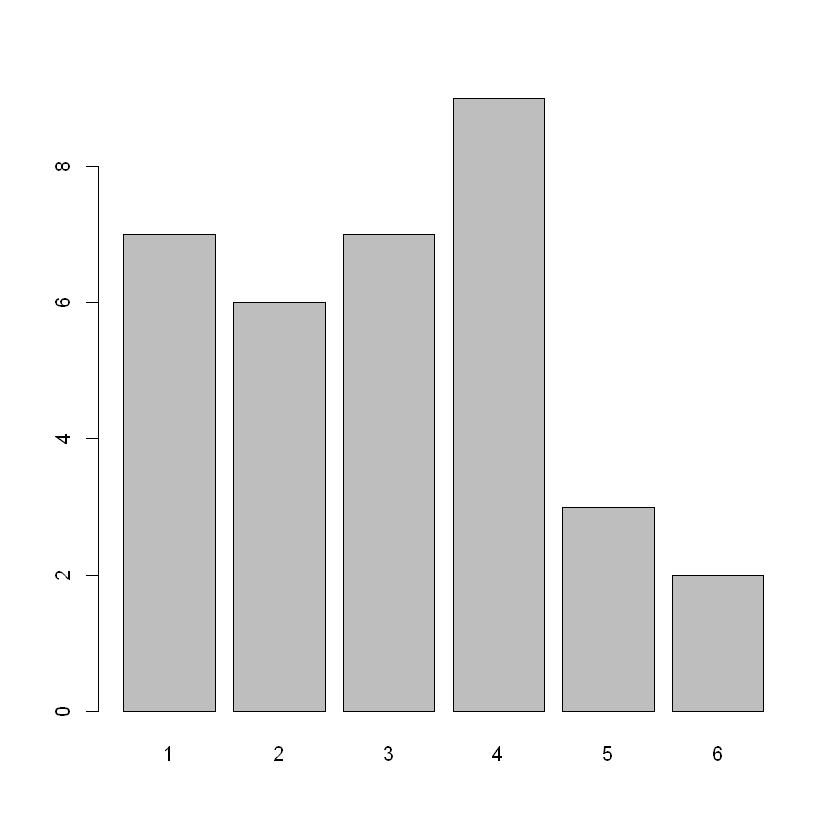

In [12]:
#막대그림
barplot(table(movie$choice_movie))

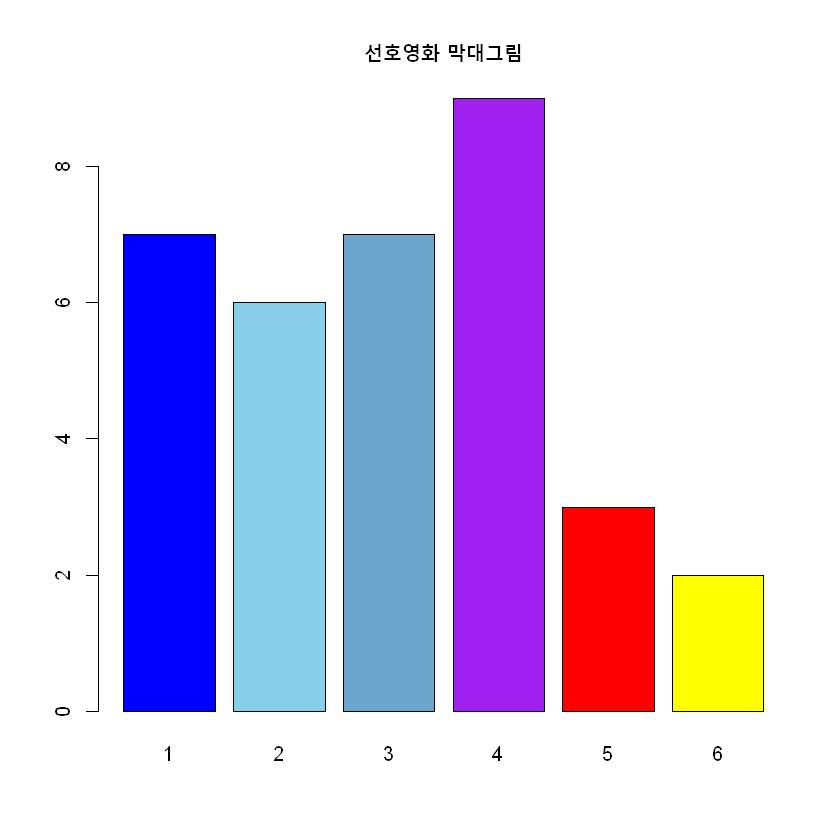

In [13]:
barplot(table(movie$choice_movie), main='선호영화 막대그림', col=c('blue', 'skyblue', 'skyblue3', 'purple', 'red', 'yellow'))

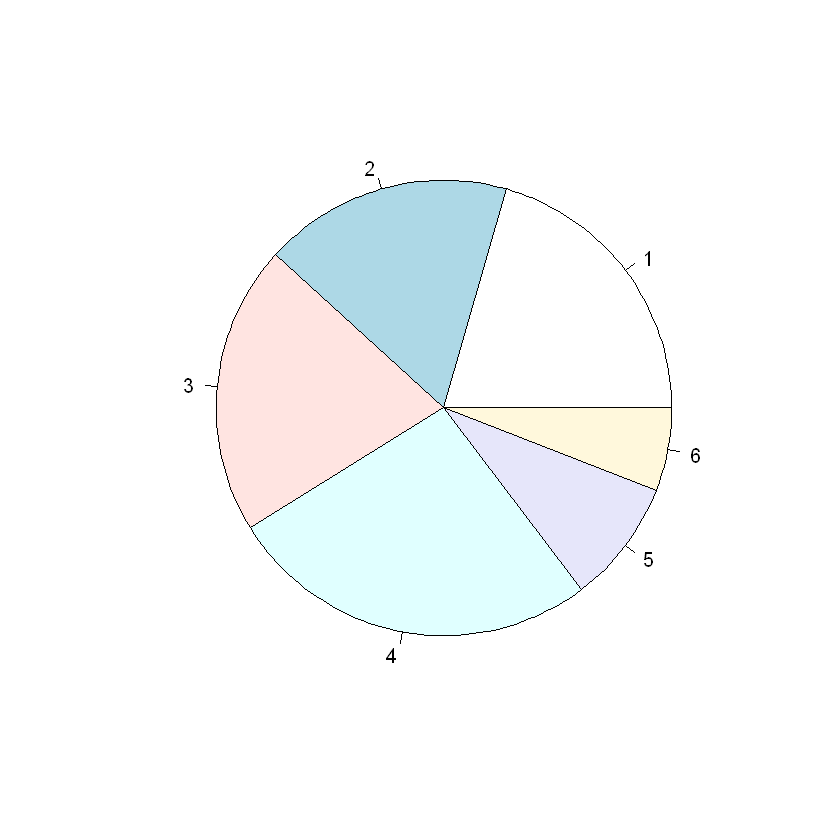

In [14]:
#원그림
pie(table(movie$choice_movie))

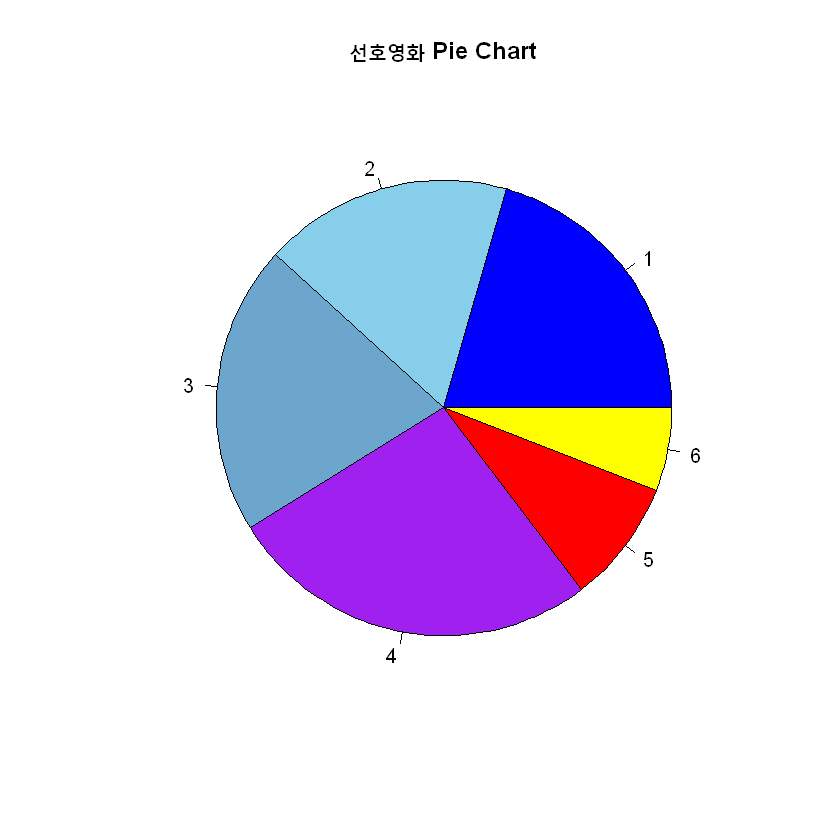

In [15]:
pie(table(movie$choice_movie), main='선호영화 Pie Chart', col=c('blue', 'skyblue', 'skyblue3', 'purple', 'red', 'yellow'))

### 2) 양적 자료의 정리: 도수분포표, 히스토그램, 줄기-잎 그림, 산점도

In [16]:
# 데이터 불러들이기
exam=read.csv('datasets/math_eng.csv')

In [17]:
# 변수명 확인
names(exam)

[1] "No"   "math" "eng"

In [18]:
#갯수와 변수의 수 확인
dim(exam)

[1] 34  3

In [19]:
# 도수분포표의 계급 지정
a=cut(exam$eng, breaks=c(50,60,70,80, 90, 100))

In [20]:
# 도수분포표
table(a)

a
 (50,60]  (60,70]  (70,80]  (80,90] (90,100] 
       4        3        9        6        4 

In [21]:
# 도수, %, 누적도수 누적 %
cbind(table(a), table(a)/length(a), cumsum(table(a)), cumsum(table(a)/length(a)))

"(50,60]",4,0.11764706,4,0.1176471
"(60,70]",3,0.08823529,7,0.2058824
"(70,80]",9,0.26470588,16,0.4705882
"(80,90]",6,0.17647059,22,0.6470588
"(90,100]",4,0.11764706,26,0.7647059


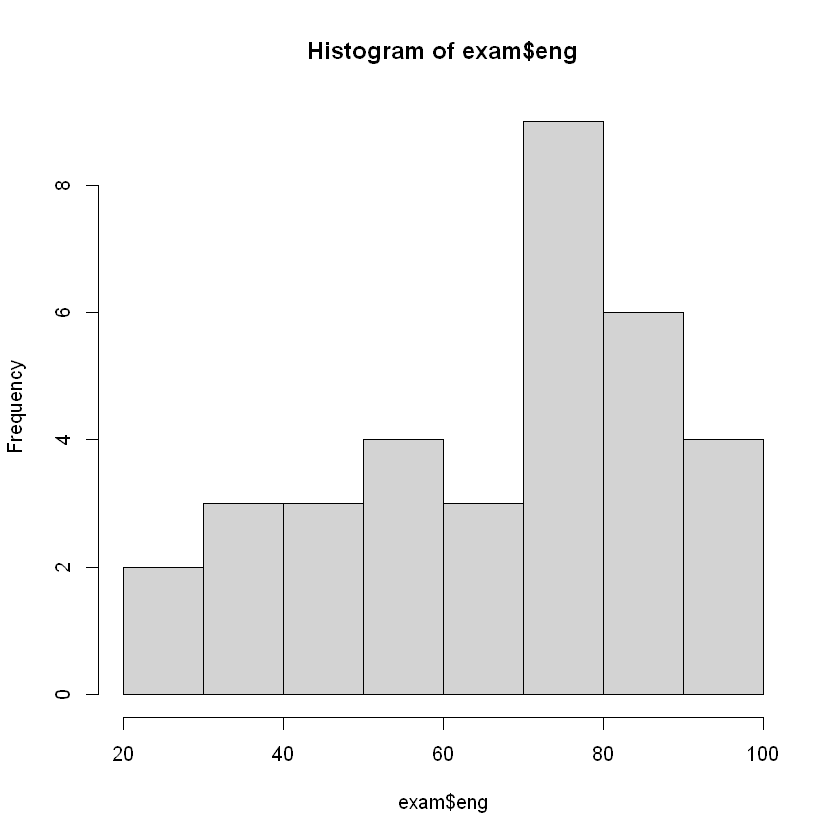

In [23]:
# 히스토그램
hist(exam$eng)

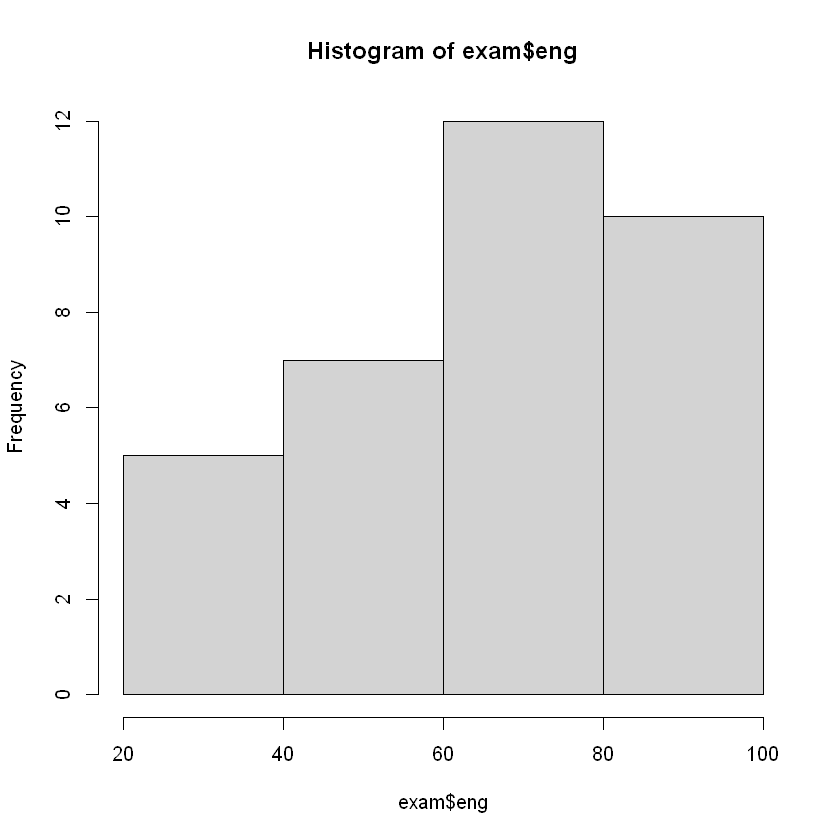

In [24]:
hist(exam$eng, breaks=4) # 구간의 개수 지정

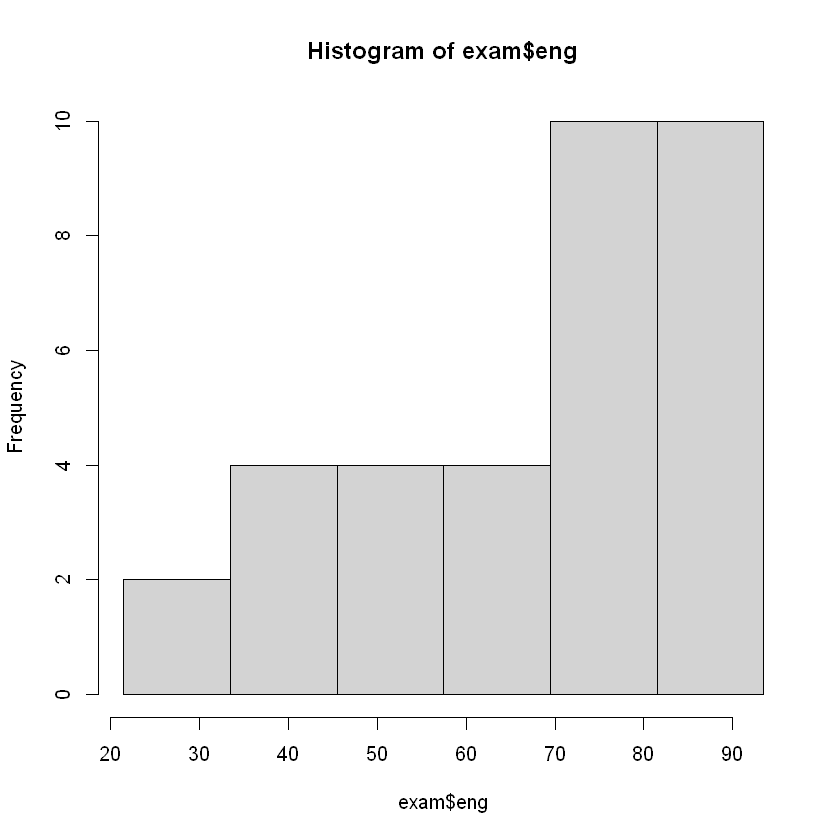

In [25]:
# 계급 지정 시
hist(exam$eng,breaks=c(21.5,33.5,45.5,57.5, 69.5, 81.5, 93.5))

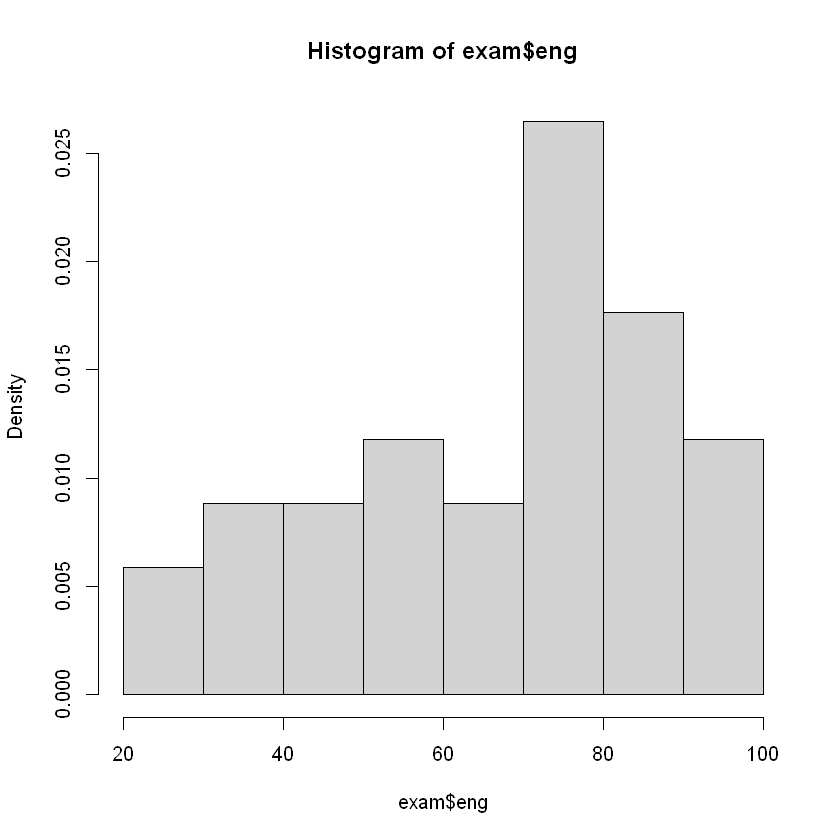

In [26]:
# 상대도수를 Y 축에
hist(exam$eng, probability=TRUE)

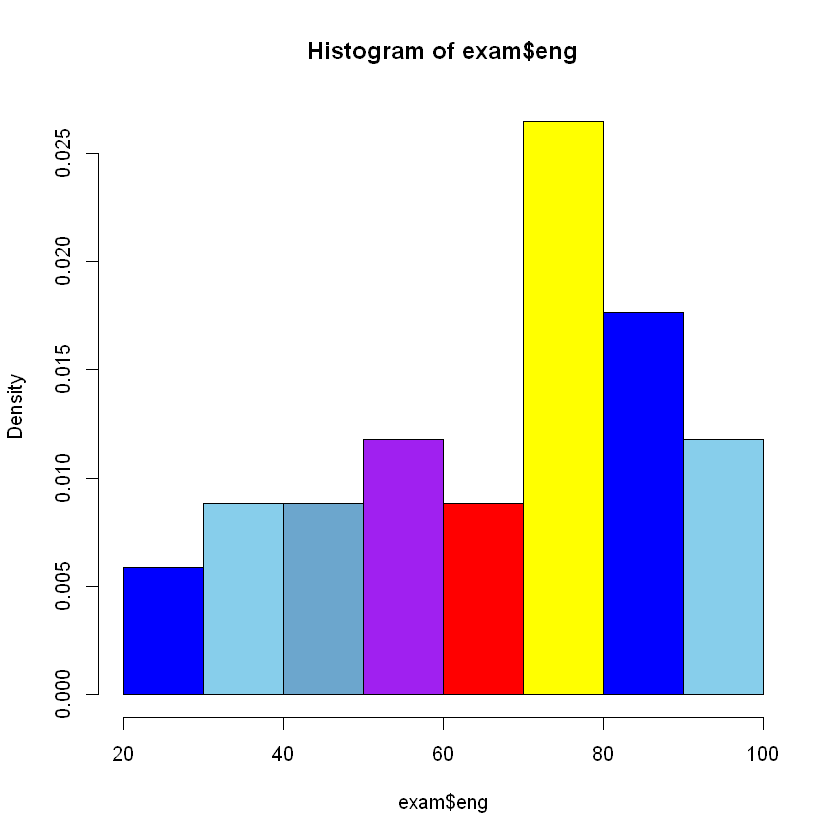

In [27]:
# 색깔 추가
hist(exam$eng, probability=TRUE, col=c('blue', 'skyblue', 'skyblue3', 'purple', 'red', 'yellow'))

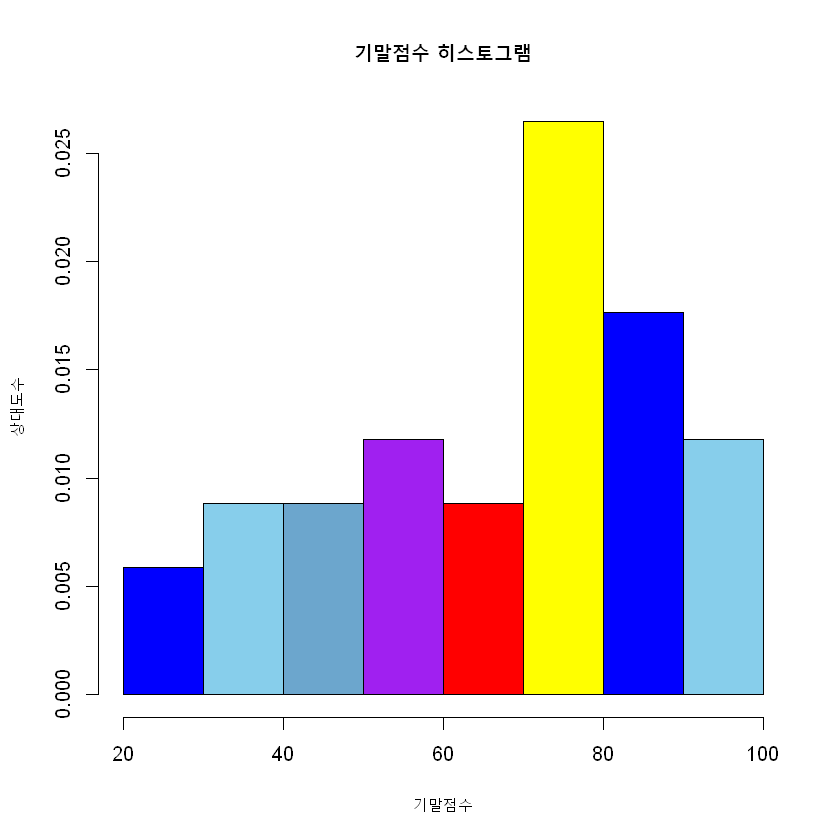

In [28]:
# 제목 달기
hist(exam$eng, probability=TRUE, col=c('blue', 'skyblue', 'skyblue3', 'purple', 'red', 'yellow'), 
    xlab="기말점수", ylab="상대도수", main="기말점수 히스토그램")

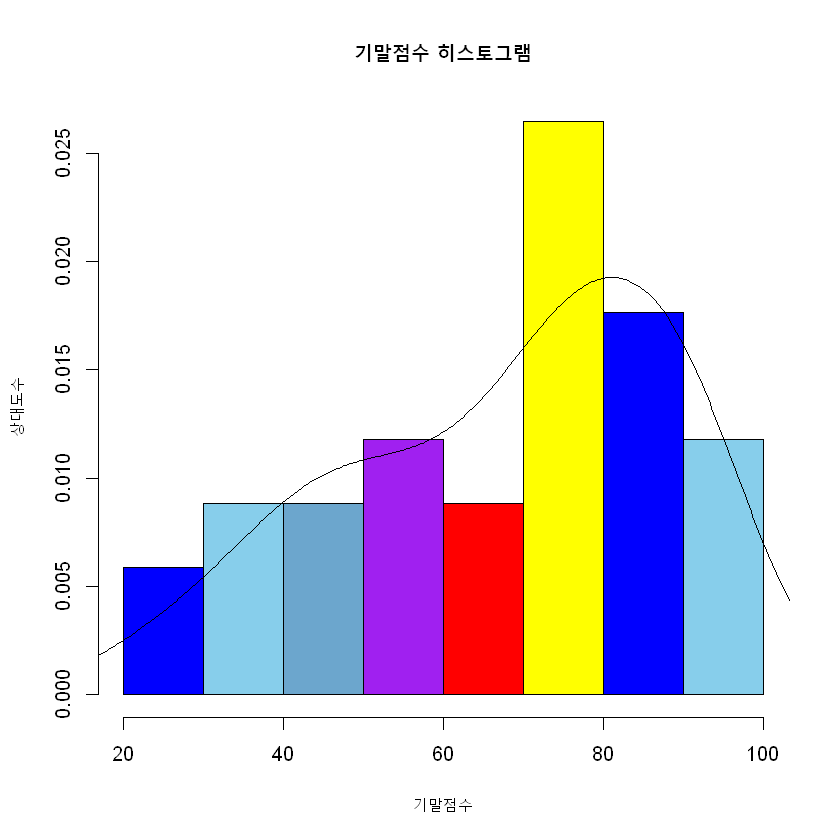

In [31]:
# 분포선 추가
hist(exam$eng, probability=TRUE, col=c('blue', 'skyblue', 'skyblue3', 'purple', 'red', 'yellow'), 
    xlab="기말점수", ylab="상대도수", main="기말점수 히스토그램")
lines(density(exam$eng), col='black')

In [32]:
# 줄기-잎 그림
stem(exam$math)


  The decimal point is 1 digit(s) to the right of the |

   0 | 7
   1 | 
   2 | 
   3 | 
   4 | 5
   5 | 0155
   6 | 00457
   7 | 023558
   8 | 0001255678
   9 | 55688
  10 | 00



In [33]:
stem(exam$eng)


  The decimal point is 1 digit(s) to the right of the |

  2 | 2
  3 | 06
  4 | 00579
  5 | 239
  6 | 025
  7 | 01235589
  8 | 0025889
  9 | 02223



In [34]:
stem(exam$math, 2) #줄기를 2배로 늘리기


  The decimal point is 1 digit(s) to the right of the |

   0 | 7
   1 | 
   1 | 
   2 | 
   2 | 
   3 | 
   3 | 
   4 | 
   4 | 5
   5 | 01
   5 | 55
   6 | 004
   6 | 57
   7 | 023
   7 | 558
   8 | 00012
   8 | 55678
   9 | 
   9 | 55688
  10 | 00



In [35]:
stem(exam$math, 0.5) #줄기를 0.5배로 줄이기


  The decimal point is 1 digit(s) to the right of the |

   0 | 7
   2 | 
   4 | 50155
   6 | 00457023558
   8 | 000125567855688
  10 | 00



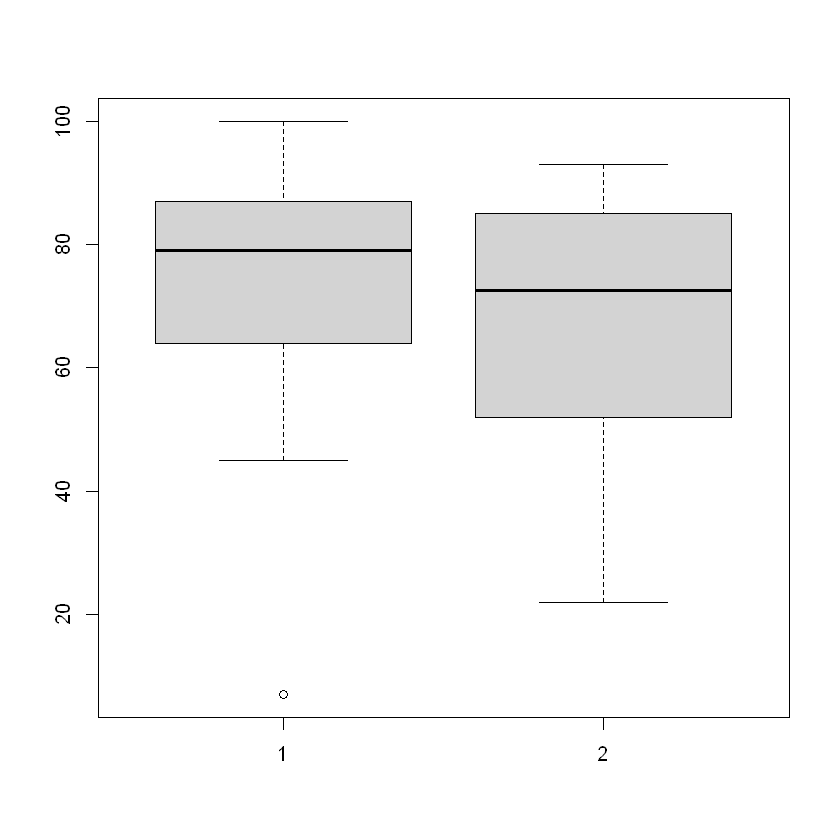

In [36]:
# 상자그림
boxplot(exam$math, exam$eng)

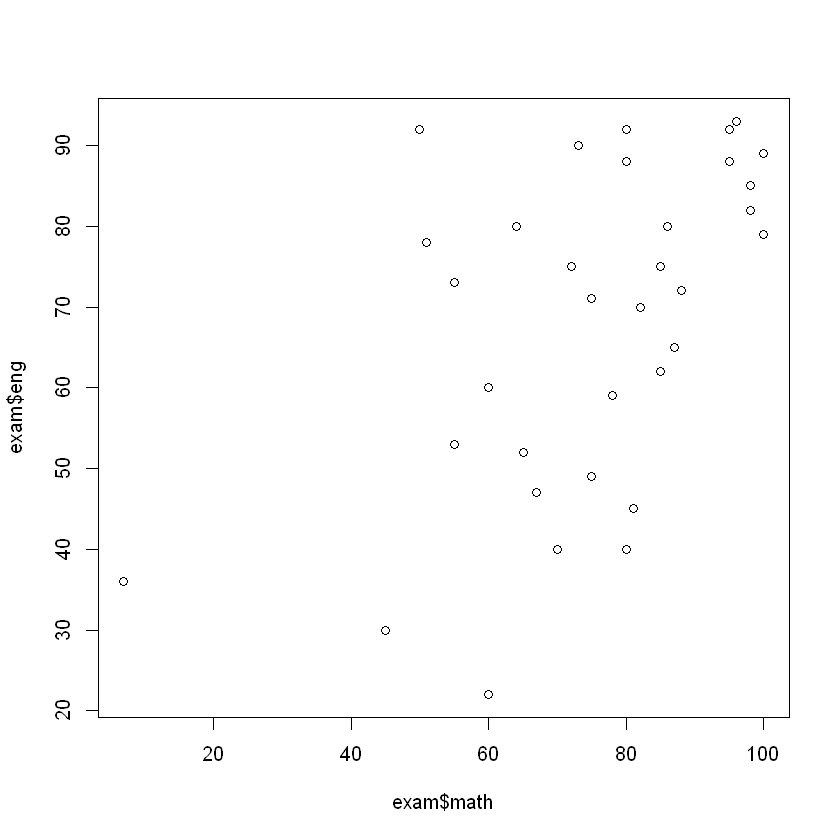

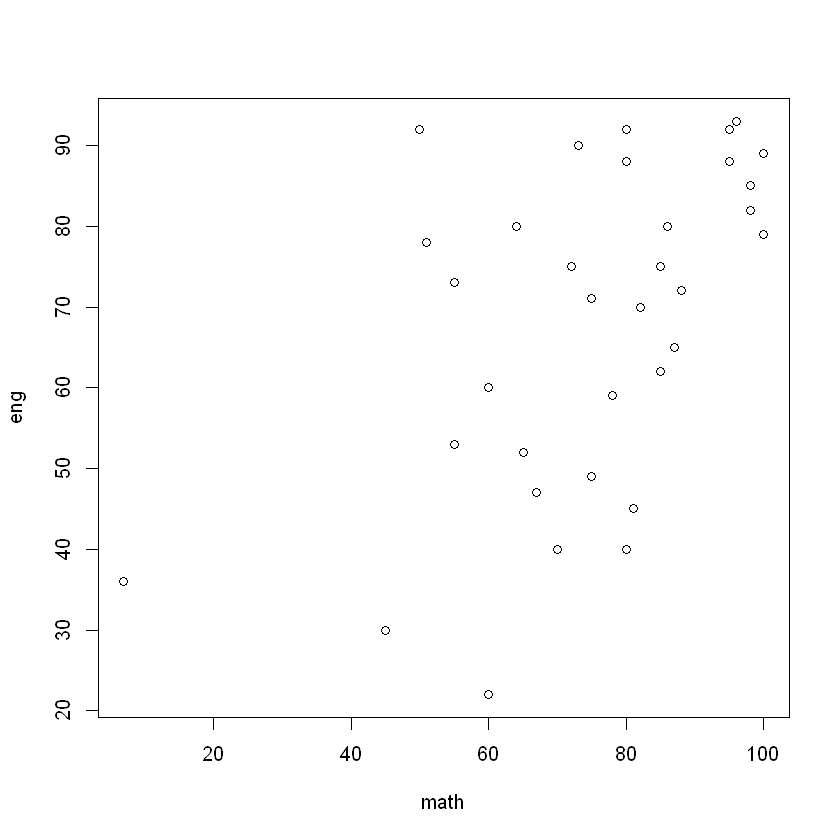

In [37]:
# 산점도
plot(exam$math, exam$eng)
plot(formula=eng~math, data=exam)